# Run an agent based SEIRX simulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../school')
from model_nursing_home import SEIRX_nursing_home
import viz

## Single model run

In [4]:
# interaction network of inhabitants
G = nx.readwrite.gpickle.read_gpickle('../data/nursing_home/interactions_single_quarter.gpickle')
# number of inhabitants
N_patients = len(G.nodes)
# number of steps (days) the simulation will run
N_steps = 100
# verbosity level (can be 0, 1, 2) that prints increasingly detailed information
# about the simulation
verbosity = 0
# enables testing and tracing actions (run with testing=False) to simulate
# unhindered spread of the virus through the nursing home
testing = 'preventive'
# in "continuous" mode employees will have a (low) probability to become an index
# case in every simulation step and introduce new infections. In "single" mode,
# a single infection is introduced through an employee in the first simulation
# step but employees no longer have a probability to become newly infected in
# every time step
index_case = 'continuous'
# test technology and turnover time used in the simulation
preventive_screening_test_type = 'one_day_PCR'
# agent types used in the simulation with their respective parameters
agent_types = {
    'employee':{'screening_interval': 3,
                'index_probability': 0.1,
                'transmission_risk': 0.022,
                'reception_risk': 1,
                'symptom_probability': 0.6},
    
    'resident':{'screening_interval': None,
                'index_probability': 0,
                'transmission_risk': 0.022,
                'reception_risk': 1,
                'symptom_probability': 0.6},
}

# fixed seed of the simulation, using the same seed repeats the same simulation
# if the same parameters are chosen
seed = 1

model = SEIRX_nursing_home(
    G,verbosity=verbosity, testing=testing,
    index_case=index_case, agent_types = agent_types,
    preventive_screening_test_type=preventive_screening_test_type)

for i in range(N_steps):
    if verbosity > 0: print('*** step {} ***'.format(i+1))
    model.step()

### Visualise time-series of inhabitant infections

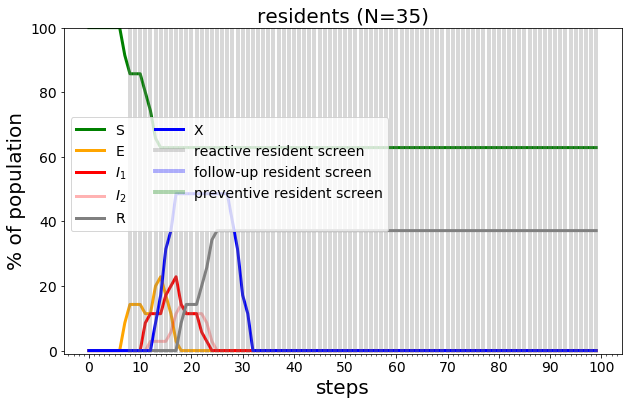

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
viz.draw_infection_timeline(model, 'resident', ax)

### Visualise time-series of employee infections

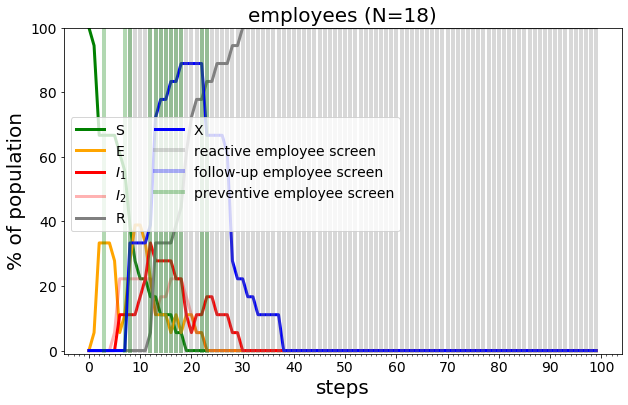

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
viz.draw_infection_timeline(model, 'employee', ax)

### Visualise a snapshot of agent states

In [7]:
pos = nx.drawing.layout.spring_layout(G, dim=2, weight='weight')

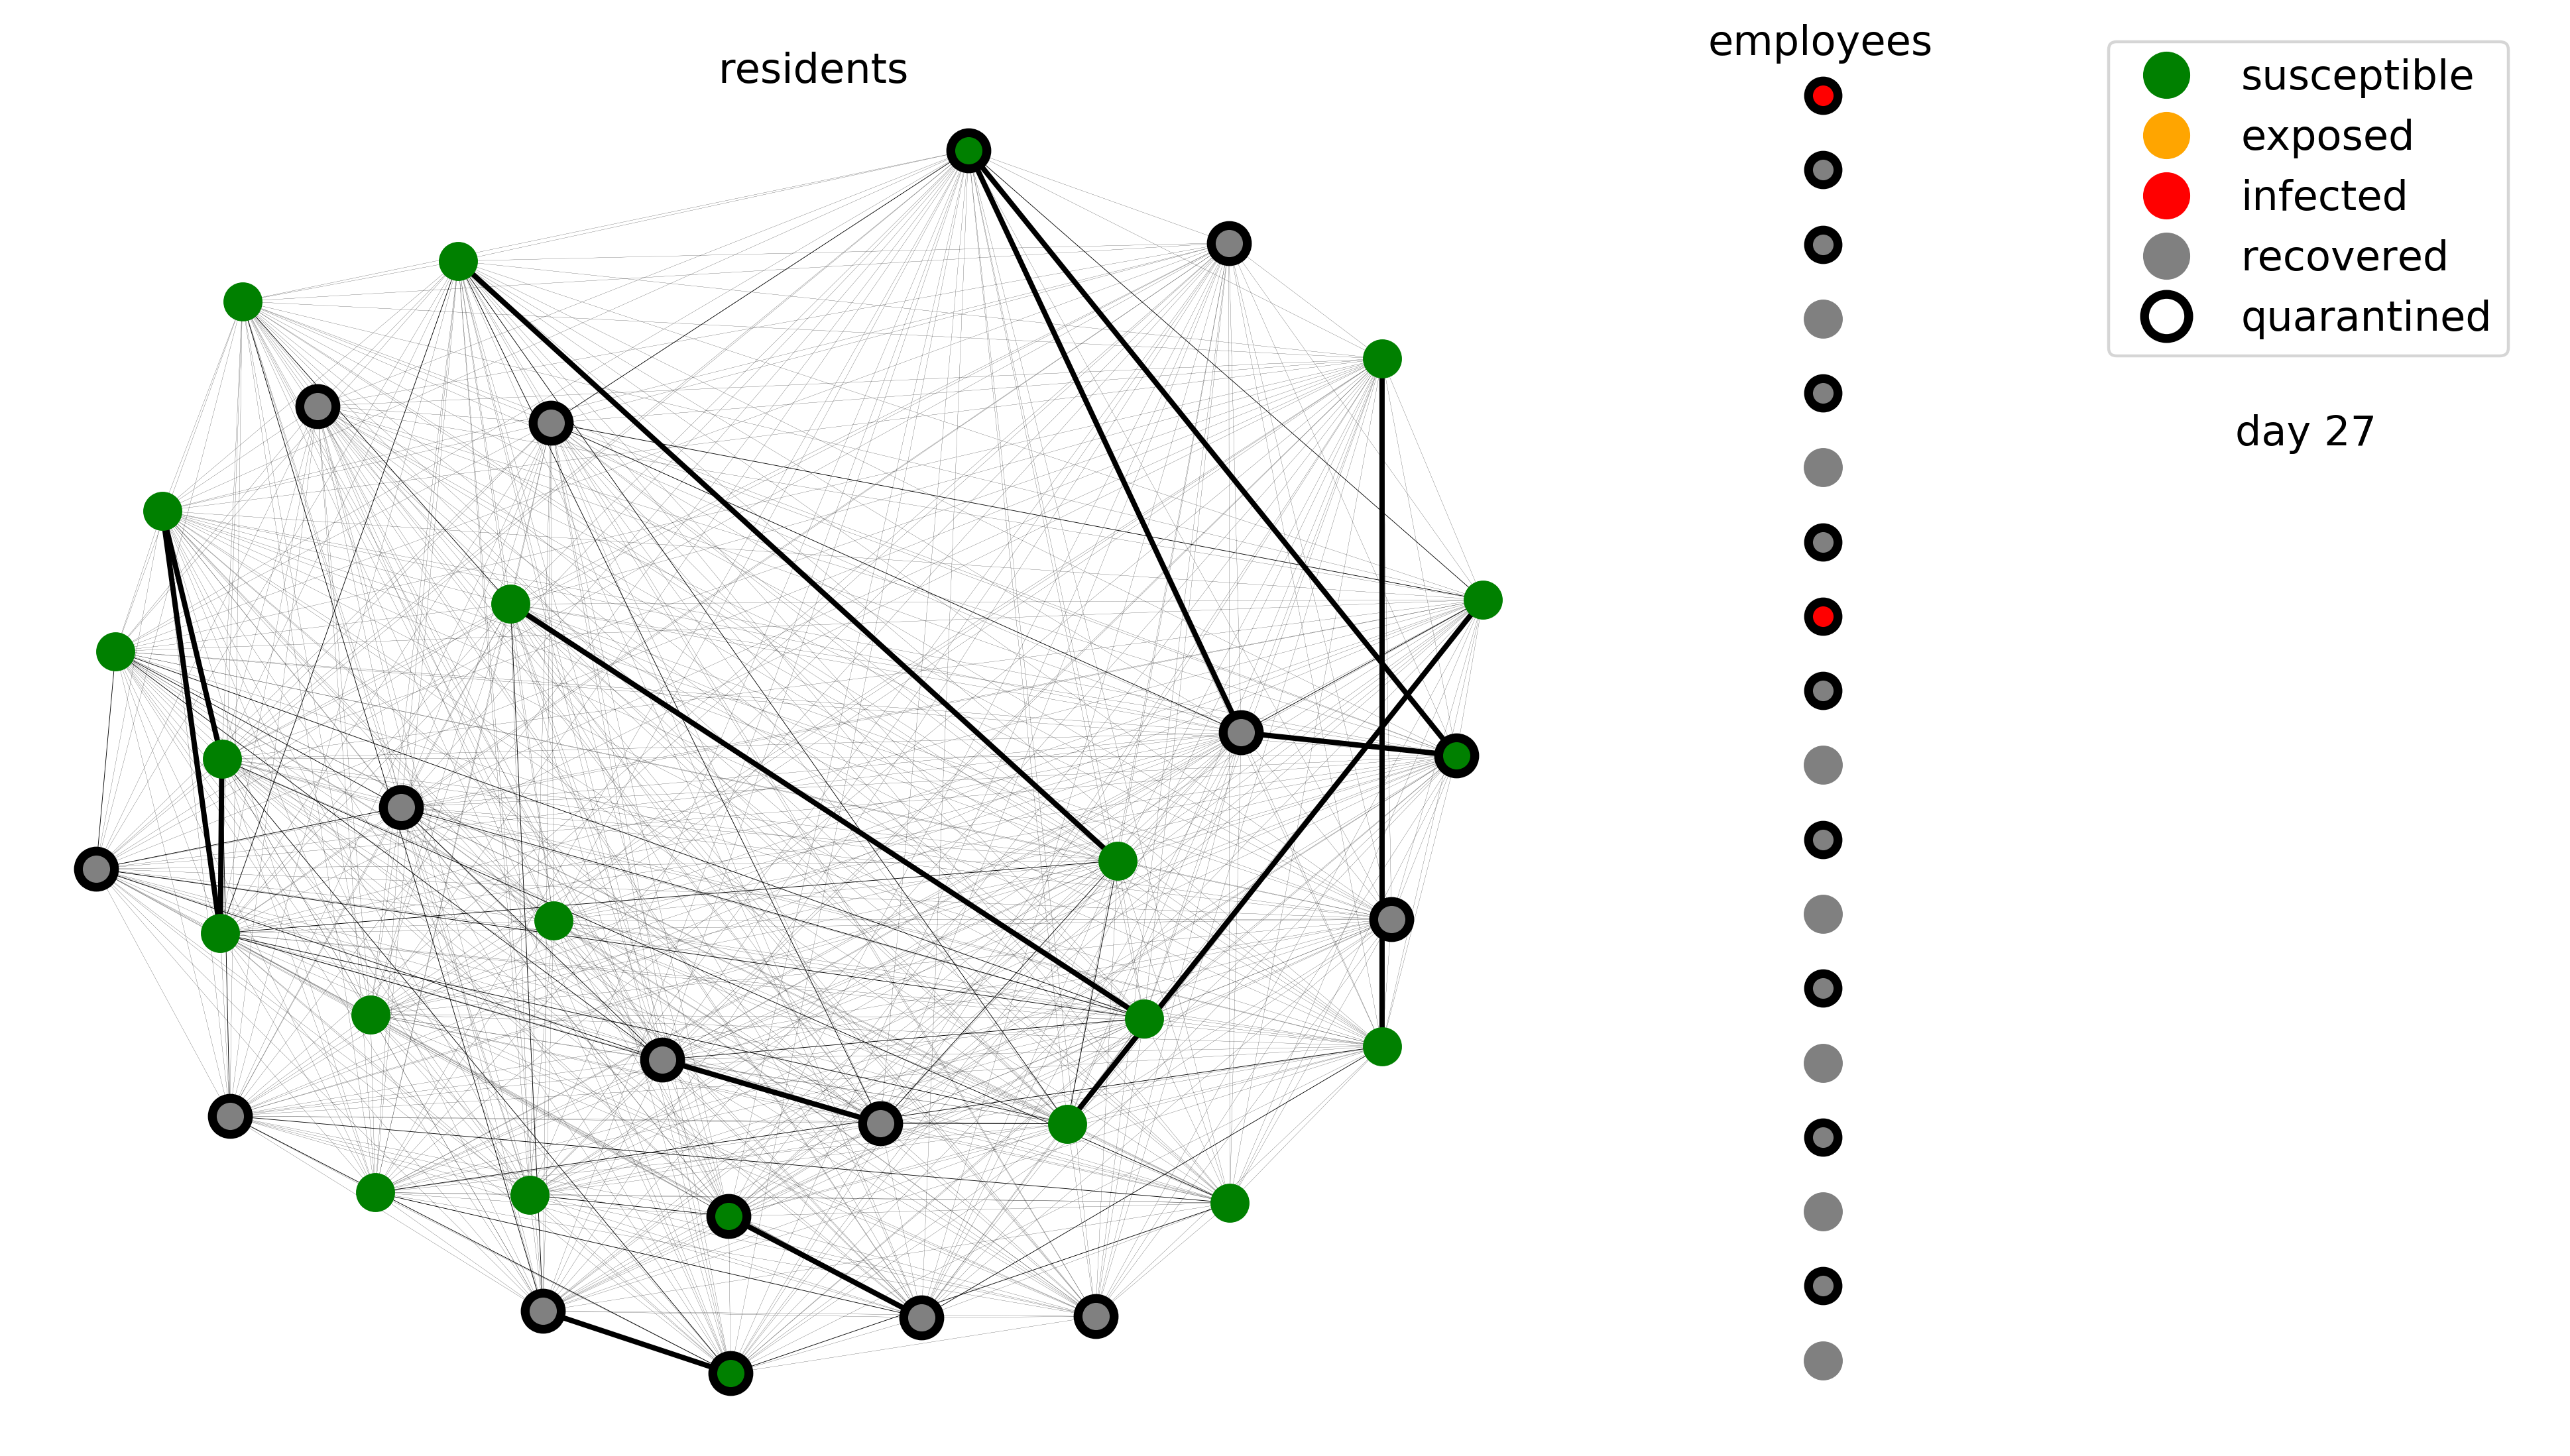

In [8]:
fig = plt.figure(constrained_layout=True,figsize=(12, 13.5/2), dpi=320)
widths = [5, 1.5, 1.5]
heights = [1]
spec = fig.add_gridspec(ncols=3, nrows=1, width_ratios=widths, wspace=0.0)

resident_ax = fig.add_subplot(spec[0])
employee_ax = fig.add_subplot(spec[1])
legend_ax = fig.add_subplot(spec[2])
    
legend, employee_handles, resident_handles, test_handle = viz.draw_states(model, 27, pos, \
                                    resident_ax, employee_ax, legend_ax)

### Have a peek at the raw data

In [9]:
data = model.datacollector.get_model_vars_dataframe()
data.head(2)

,E_employee,I_employee,I_asymptomatic_employee,I_symptomatic_employee,R_employee,X_employee,E_resident,I_resident,I_asymptomatic_resident,I_symptomatic_resident,...,screen_residents_follow_up,screen_residents_preventive,screen_employees_reactive,screen_employees_follow_up,screen_employees_preventive,N_diagnostic_tests,N_preventive_screening_tests,undetected_infections,predetected_infections,pending_test_infections
0,0,0,0,0.0,0,0,0,0,0,0.0,...,False,False,False,False,False,0,0,0,0,0
1,1,0,0,0.0,0,0,0,0,0,0.0,...,False,False,False,False,False,0,0,0,0,0
